Find normalization that works for features

In [5]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import read_quote      as rq
import stock_functions as sf
import df_visualizations as dv
import remap_values as rv

import sys
import time

In [6]:
%matplotlib inline
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (14, 10)

colorz = [ 'white', 'red', 'blue', 'green', 'orange', 'cyan', 'olivedrab', 'darkred', 'steeleblue', 'seagreen' ]

In [7]:
roll_nums = [3,5,7,10,12,15,18,20,22,25,28,30] # Generate an algorithm for predicting every few days
mom_nums  = [3,5,10,15,20,25,30]               # Momentum has many good tracers
rsi_nums  = [5,10,15,20,25]                    # Good for some long term trends
band_nums = [5,10,15,20,25]                    # A few trace different areas well

In [8]:
# Loop this over inpFiles, plotting distributions and listing statistics

In [51]:
def plotDist( inpList, select_col, xRange=None, yRange=None, scale=False, logit=False,
             diffs=False, moms=False, rsi=False, bands=False, norm=False, n_bins=None, vheight=10, n_col=3, SUM=False ):

    if ( not ( diffs or moms or rsi or bands or SUM ) ):
        print 'Set diffs, moms, rsi, or bands to True'
    
    
    fig, ax = plt.subplots( int((len(inpList)+1)/n_col), n_col, sharex='col', sharey='row', figsize=(14,vheight) )
    means = []
    stds  = []
    
    sums_arr = []
    
    for i in range( 0, len(inpList)):
        fileName = 'quotes/'+inpList[i]+'.csv'
        quote = rq.readQuote( fileName )

        #rolls = sf.generate_rolling_close   ( quote, roll_nums )
        selected = None
        if ( diffs ):
            selected = sf.generate_differentials   ( quote            ).drop('diff_v',axis=1)
        if ( moms  ):
            selected = sf.generate_momentum_close  ( quote, mom_nums  )
        if ( rsi   ):
            selected = sf.generate_rsi             ( quote, rsi_nums  )
        if ( bands ):
            selected = sf.generate_bollinger_bands ( quote, band_nums )

        foo = selected
        if ( logit ):
            foo[select_col] = np.log10( foo[select_col] )
        if ( norm ):
            foo[select_col] = rv.smart_scale( selected, column=select_col, show_plot=False )

        if ( not SUM ):
            if ( n_bins==None ):
                ax[i/n_col,i%n_col].hist( foo[select_col] )
            else:
                ax[i/n_col,i%n_col].hist( foo[select_col], bins=n_bins )
            ax[i/n_col,i%n_col].set_title( inpFileList[i] )

            if ( xRange != None ):
                ax[i/n_col,i%n_col].set_xlim([ xRange[0] , xRange[1] ])
            if ( yRange != None ):
                ax[i/n_col,i%n_col].set_ylim([ yRange[0] , yRange[1] ])

            means.append( foo[select_col].mean() )
            stds .append( foo[select_col].std () )

        else:
            
            for val in foo[select_col].values:
                sums_arr.append( val )
            
    if ( SUM ):
        plt.clf()
        if ( n_bins==None ):
            plt.hist( foo[select_col] )
        else:
            plt.hist( foo[select_col], bins=n_bins )
        if ( xRange != None ):
            plt.xlim([ xRange[0] , xRange[1] ])
        if ( yRange != None ):
            plt.ylim([ yRange[0] , yRange[1] ])
        
    plt.show()

    print '       ',
    for i in inpFileList:
        print '%7s '%i,
    print '\nMeans: ',
    for i in means:
        print '%7.4f '%i,
    print '\nStdDv: ',
    for i in stds:
        print '%7.4f '%i,
    print ''

In [10]:
longFileList = ['aapl','acm','amzn','awk','awr','bac','ba','cat','c','cop','cvx','dal','dd','farm','fdp',
               'gnc','hes','ibm','mas','mcd','mon','msex','msft','nflx','sbux','strl','tgt','tsla','ups','vmc','xom','xpo']

In [62]:
inpFileList = ['aapl','awr','ba','cat','cop','dal','farm','gnc','hes','mas','mon','nflx','sbux','tsla','ups']
shortFileList = inpFileList

/home/sean/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:32: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


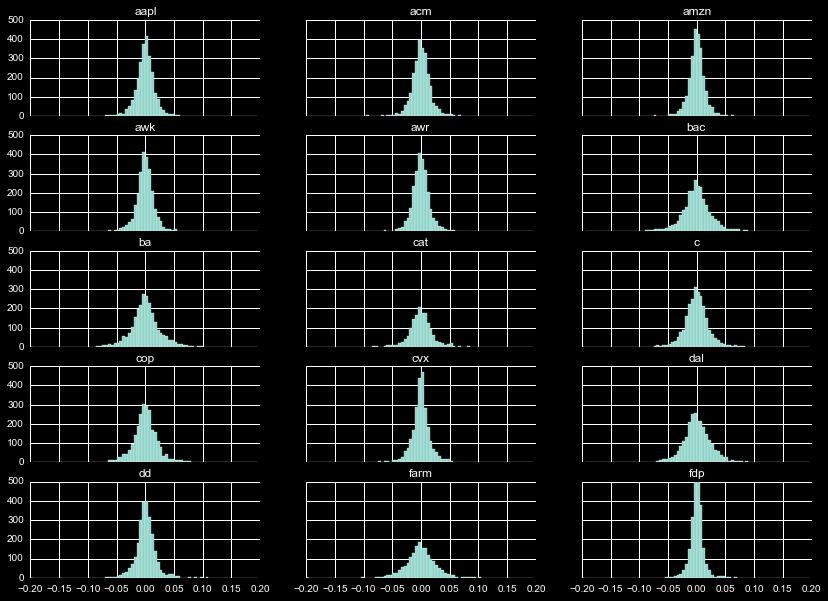

           aapl      acm     amzn      awk      awr      bac       ba      cat        c      cop      cvx      dal       dd     farm      fdp      gnc      hes      ibm      mas      mcd      mon     msex     msft     nflx     sbux     strl      tgt     tsla      ups      vmc      xom      xpo  
Means:  -0.0001   0.0005   0.0003  -0.0001  -0.0001  -0.0002   0.0006  -0.0003  -0.0001   0.0004   0.0001   0.0017   0.0011  -0.0001   0.0004  
StdDv:   0.0172   0.0175   0.0147   0.0170   0.0171   0.0325   0.0281   0.0234   0.0236   0.0245   0.0181   0.0274   0.0178   0.0282   0.0115  


In [43]:
plotDist( shortFileList, 'diff_co',                yRange=[0,500], diffs=True, norm=False, n_bins=np.arange(-0.2,0.2,0.005), vheight=10 )

/home/sean/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:32: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


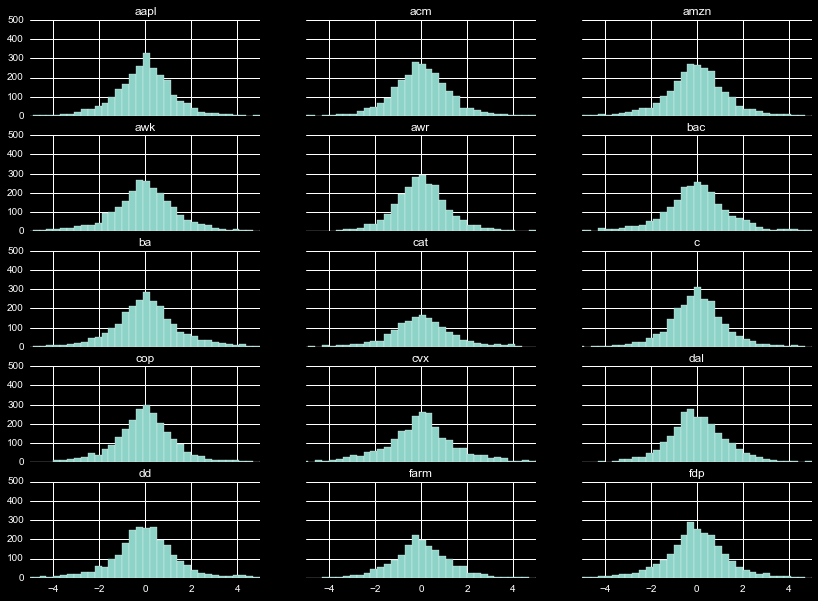

           aapl      acm     amzn      awk      awr      bac       ba      cat        c      cop      cvx      dal       dd     farm      fdp      gnc      hes      ibm      mas      mcd      mon     msex     msft     nflx     sbux     strl      tgt     tsla      ups      vmc      xom      xpo  
Means:  -0.0386   0.0163  -0.0141  -0.0270   0.0232  -0.0093   0.0674   0.0030   0.0131   0.0080  -0.0023   0.0665   0.0278   0.0027   0.0142  
StdDv:   1.4539   1.4839   1.4854   1.6837   1.4476   1.9196   1.6705   1.7146   1.4901   1.5527   2.0621   1.5294   1.6057   1.4435   1.6826  


In [44]:
plotDist( shortFileList, 'diff_co', xRange=[-5,5], yRange=[0,500], diffs=True, norm=True, n_bins=np.arange(-10,10,0.3) )

/home/sean/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:57: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


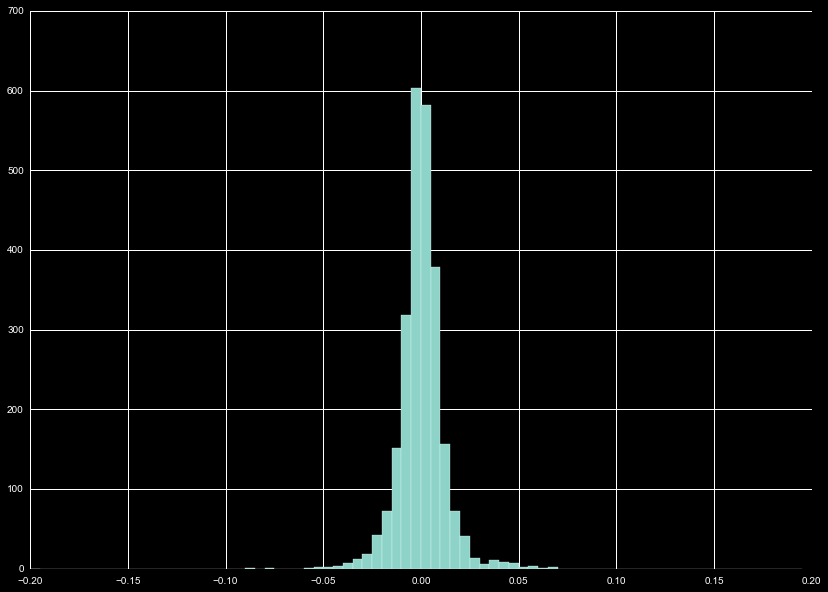

           aapl      acm     amzn      awk      awr      bac       ba      cat        c      cop      cvx      dal       dd     farm      fdp      gnc      hes      ibm      mas      mcd      mon     msex     msft     nflx     sbux     strl      tgt     tsla      ups      vmc      xom      xpo  
Means:  
StdDv:  


In [54]:
plotDist( shortFileList, 'diff_co',                yRange=[0,700], diffs=True, norm=False, n_bins=np.arange(-0.2,0.2,0.005), vheight=10 , SUM=True)

/home/sean/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:57: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


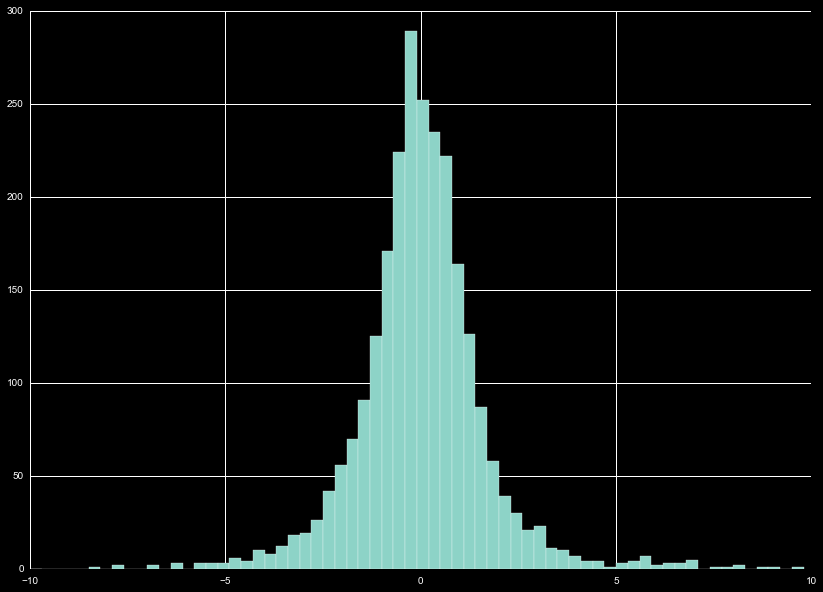

           aapl      acm     amzn      awk      awr      bac       ba      cat        c      cop      cvx      dal       dd     farm      fdp      gnc      hes      ibm      mas      mcd      mon     msex     msft     nflx     sbux     strl      tgt     tsla      ups      vmc      xom      xpo  
Means:  
StdDv:  


In [59]:
plotDist( shortFileList, 'diff_co',                yRange=[0,300], diffs=True, norm=True, n_bins=np.arange(-10,10,0.3), vheight=10 , SUM=True)

In [55]:
# Smart scale for diffs_co

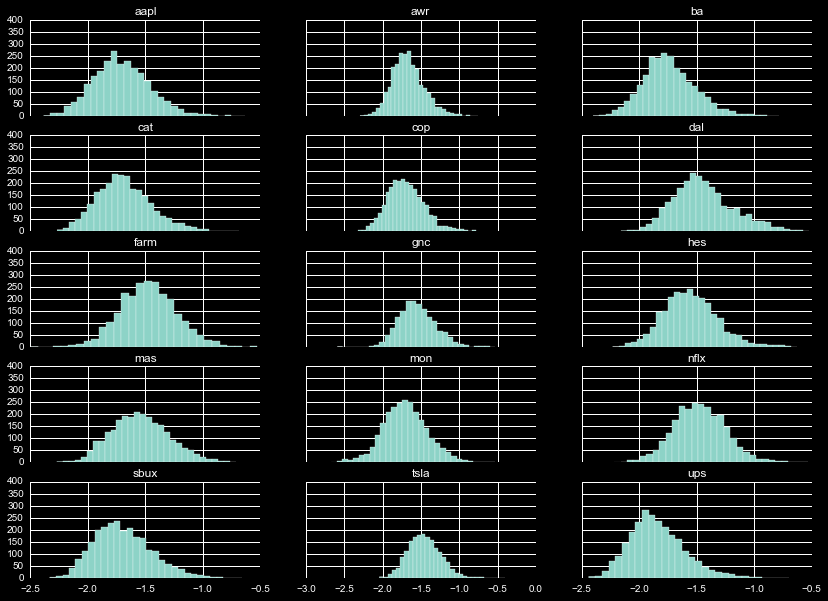

           aapl      awr       ba      cat      cop      dal     farm      gnc      hes      mas      mon     nflx     sbux     tsla      ups  
Means:  -1.7058  -1.6666  -1.7368  -1.6815  -1.6980  -1.4424  -1.4725  -1.5483  -1.5528  -1.5426  -1.7046  -1.4752  -1.6939  -1.4563  -1.8446  
StdDv:   0.2475   0.2120   0.2295   0.2391   0.2417   0.2648   0.2487   0.2372   0.2349   0.2511   0.2873   0.2252   0.2471   0.2148   0.2370  


In [67]:
plotDist( inpFileList, 'diff_hl', yRange=[0,400], diffs=True, norm=False, logit=True, n_bins=30 )

/home/sean/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:36: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


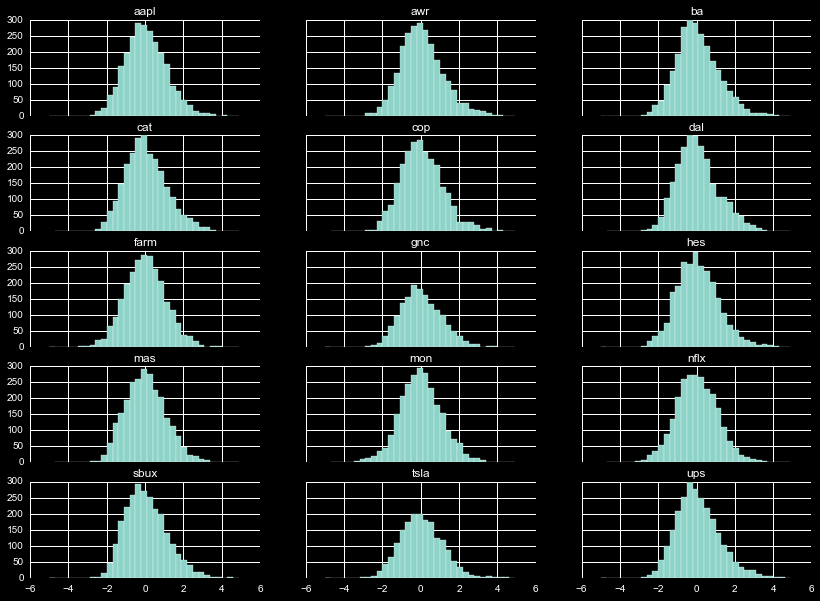

           aapl      awr       ba      cat      cop      dal     farm      gnc      hes      mas      mon     nflx     sbux     tsla      ups  
Means:   0.0505   0.0741   0.0640   0.0667   0.0721   0.0667   0.0141   0.0436   0.0653   0.0280   0.0012   0.0290   0.0543   0.0466   0.0855  
StdDv:   1.0762   1.1249   1.0954   1.0848   1.1076   1.0898   1.0650   1.0772   1.1015   1.0494   1.0912   1.0754   1.0708   1.0876   1.1193  


In [68]:
plotDist( inpFileList, 'diff_hl', yRange=[0,300], diffs=True, logit=True, norm=True , n_bins=np.arange(-5,5,0.3) )

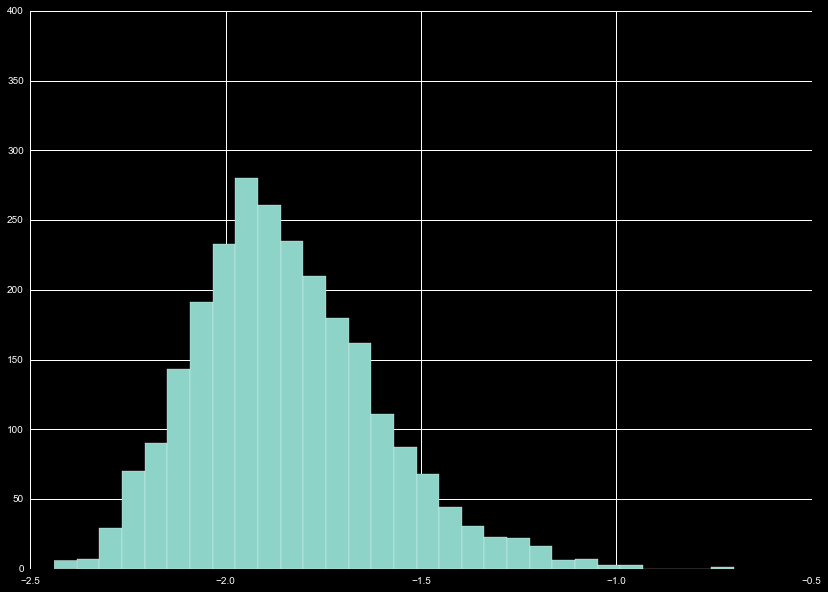

           aapl      awr       ba      cat      cop      dal     farm      gnc      hes      mas      mon     nflx     sbux     tsla      ups  
Means:  
StdDv:  


In [69]:
plotDist( inpFileList, 'diff_hl', yRange=[0,400], diffs=True, norm=False, logit=True, n_bins=30, SUM=True )

/home/sean/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:57: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


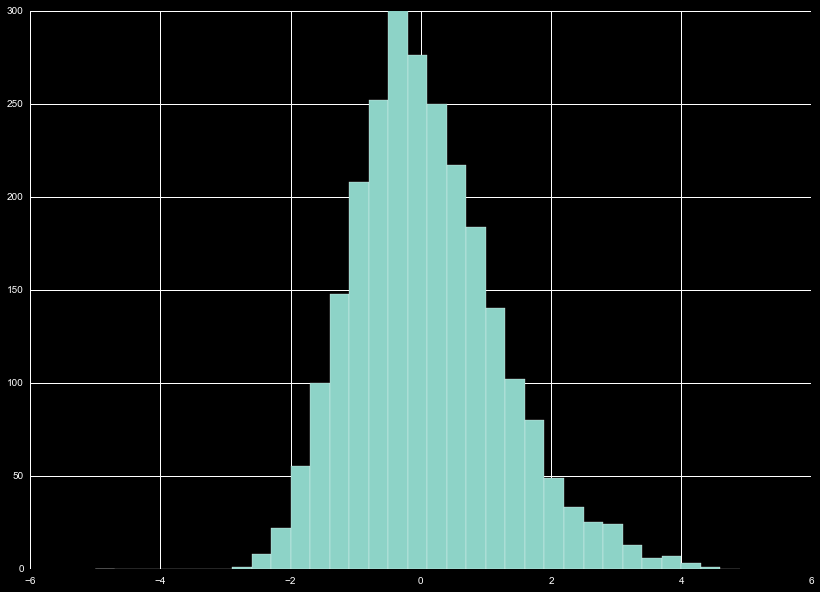

           aapl      awr       ba      cat      cop      dal     farm      gnc      hes      mas      mon     nflx     sbux     tsla      ups  
Means:  
StdDv:  


In [70]:
plotDist( inpFileList, 'diff_hl', yRange=[0,300], diffs=True, logit=True, norm=True , n_bins=np.arange(-5,5,0.3), SUM=True )

In [72]:
# Log, then smart scale the diffs_hl

In [6]:
# 3, 5, 10, 20, 30

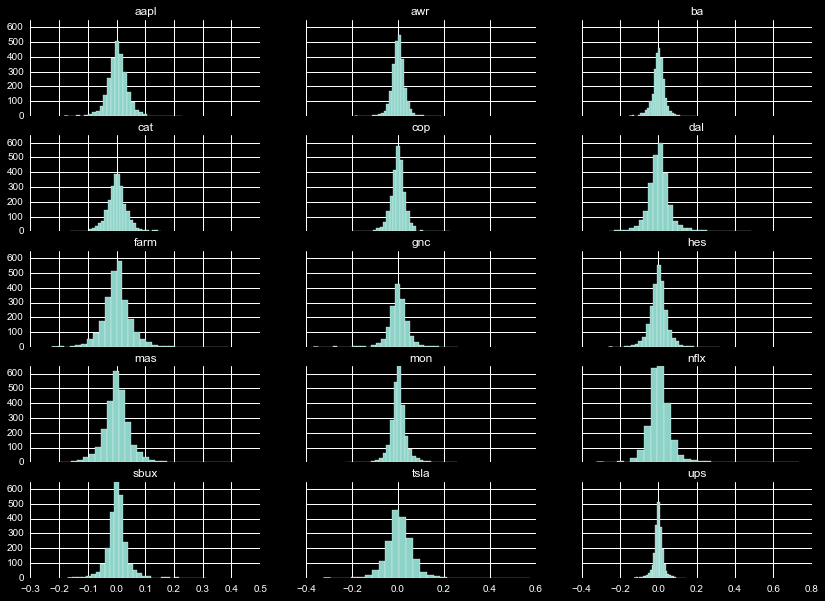

           aapl      awr       ba      cat      cop      dal     farm      gnc      hes      mas      mon     nflx     sbux     tsla      ups  
Means:   0.0035   0.0015   0.0013   0.0011   0.0002   0.0032   0.0016   0.0003   0.0006   0.0017   0.0013   0.0070   0.0024   0.0062   0.0007  
StdDv:   0.0352   0.0288   0.0314   0.0363   0.0336   0.0631   0.0483   0.0499   0.0466   0.0484   0.0355   0.0633   0.0348   0.0567   0.0237  


In [71]:
plotDist( inpFileList, 'momentum_3', yRange=[0,650], moms=True, norm=False , n_bins=30 )

/home/sean/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:36: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


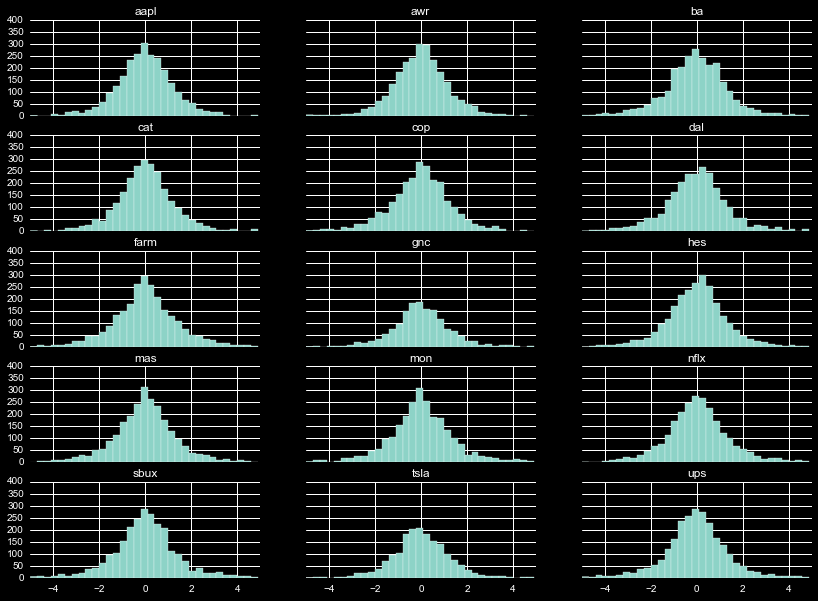

           aapl      awr       ba      cat      cop      dal     farm      gnc      hes      mas      mon     nflx     sbux     tsla      ups  
Means:  -0.0331  -0.0088  -0.0582   0.0021  -0.0327   0.0331   0.0296  -0.0472   0.0083   0.0155   0.0261   0.0937   0.0258   0.0054  -0.0364  
StdDv:   1.3198   1.3606   1.4446   1.3454   1.4899   1.7508   1.5655   1.6429   1.4056   1.5241   1.6814   1.7676   1.6209   1.3166   1.5139  


In [72]:
plotDist( inpFileList, 'momentum_3', xRange=[-5,5], yRange=[0,400], moms=True, norm=True , n_bins=np.arange(-5,5,0.3) )

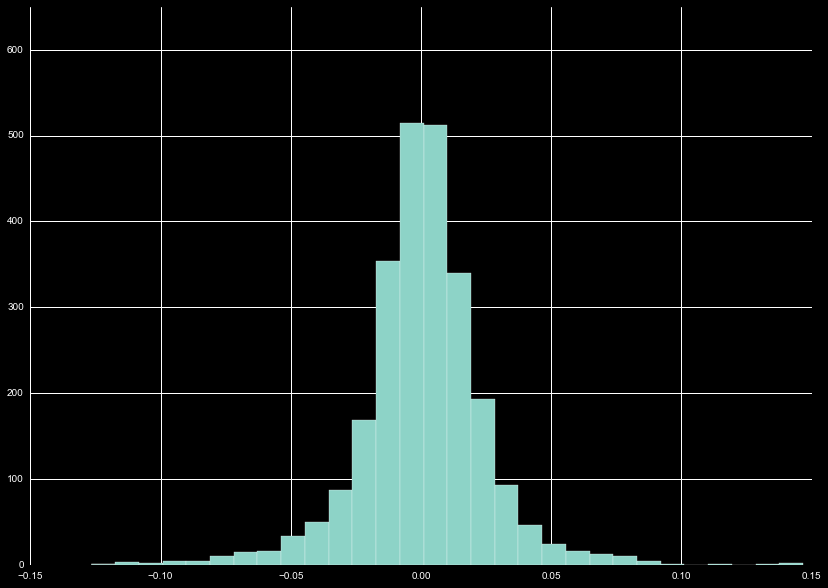

           aapl      awr       ba      cat      cop      dal     farm      gnc      hes      mas      mon     nflx     sbux     tsla      ups  
Means:  
StdDv:  


In [75]:
plotDist( inpFileList, 'momentum_3', yRange=[0,650], moms=True, norm=False , n_bins=30, SUM=True )

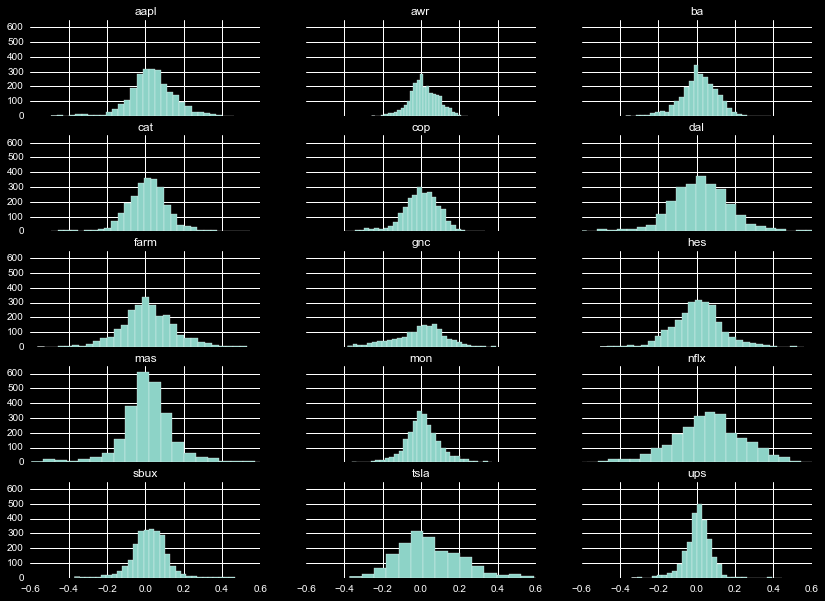

           aapl      awr       ba      cat      cop      dal     farm      gnc      hes      mas      mon     nflx     sbux     tsla      ups  
Means:   0.0352   0.0135   0.0126   0.0118   0.0006   0.0289   0.0142  -0.0049   0.0049   0.0183   0.0110   0.0722   0.0225   0.0662   0.0070  
StdDv:   0.1186   0.0748   0.0946   0.1188   0.0966   0.1766   0.1412   0.1307   0.1311   0.1596   0.0956   0.2114   0.0966   0.2097   0.0692  


In [73]:
plotDist( inpFileList, 'momentum_30', xRange=[-0.6,0.6], yRange=[0,650], moms=True, norm=False , n_bins=30 )

/home/sean/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:36: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


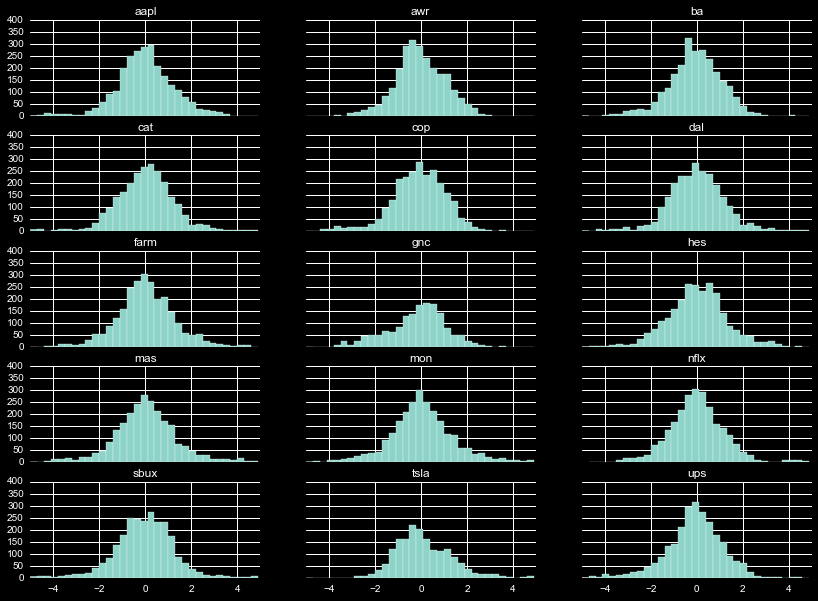

           aapl      awr       ba      cat      cop      dal     farm      gnc      hes      mas      mon     nflx     sbux     tsla      ups  
Means:  -0.0102  -0.0284  -0.0582  -0.0016  -0.1068   0.0416   0.0373  -0.1757   0.0375   0.0592   0.0646   0.0329  -0.0227   0.2305  -0.0811  
StdDv:   1.2660   1.0808   1.1614   1.3833   1.2094   1.3852   1.2415   1.2601   1.3242   1.8682   1.4326   1.2644   1.3693   1.4722   1.3295  


In [74]:
plotDist( inpFileList, 'momentum_30', xRange=[-5,5], yRange=[0,400], moms=True, norm=True , n_bins=np.arange(-5,5,0.3) )

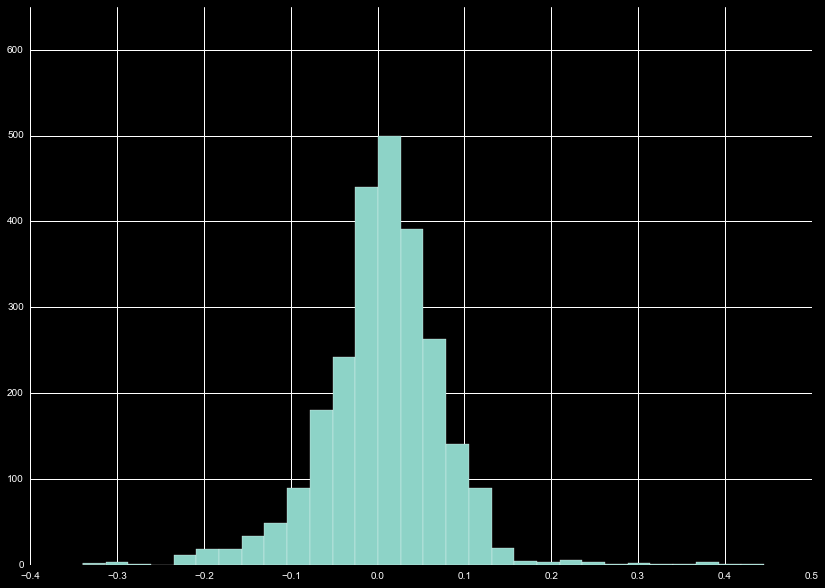

           aapl      awr       ba      cat      cop      dal     farm      gnc      hes      mas      mon     nflx     sbux     tsla      ups  
Means:  
StdDv:  


In [76]:
plotDist( inpFileList, 'momentum_30', yRange=[0,650], moms=True, norm=False , n_bins=30, SUM=True )

In [18]:
# Momentum can all be smart scaled

In [19]:
# rsi 10, 15

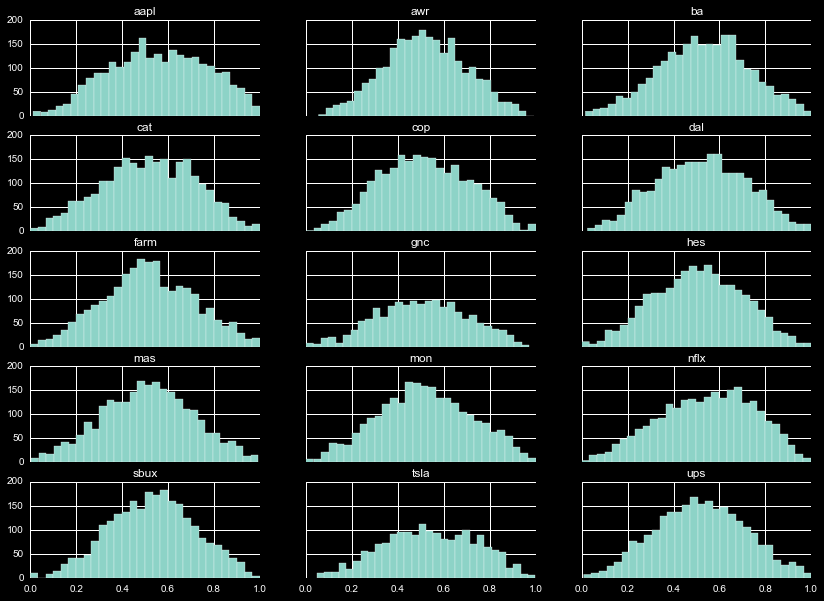

           aapl      awr       ba      cat      cop      dal     farm      gnc      hes      mas      mon     nflx     sbux     tsla      ups  
Means:   0.5582   0.5198   0.5325   0.5163   0.5138   0.5207   0.5146   0.5074   0.5068   0.5113   0.5181   0.5442   0.5329   0.5396   0.5195  
StdDv:   0.2132   0.1771   0.1957   0.2024   0.1955   0.1963   0.1980   0.1978   0.1938   0.1980   0.2032   0.2065   0.1859   0.1996   0.1952  


In [77]:
plotDist( inpFileList, 'rsi_10', xRange=[0,1], yRange=[0,200], rsi=True, norm=False , n_bins=30 )

/home/sean/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:36: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


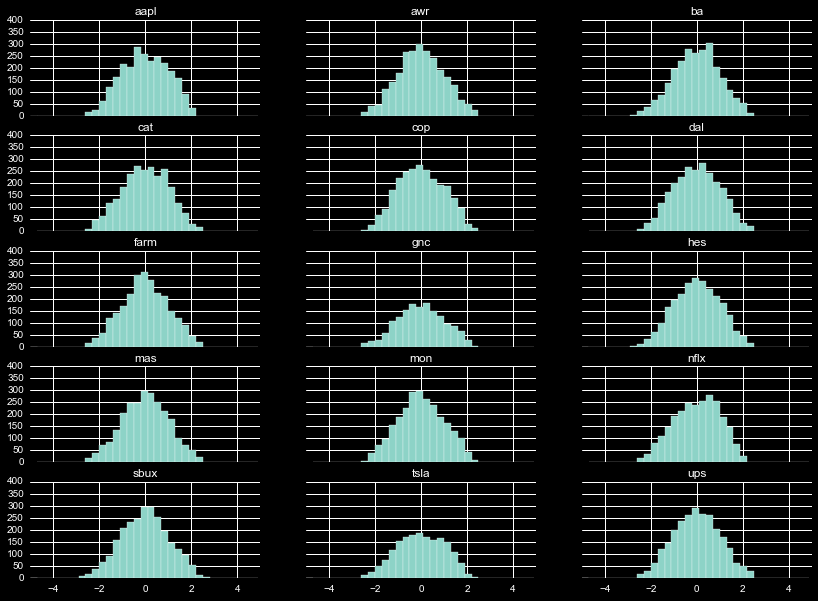

           aapl      awr       ba      cat      cop      dal     farm      gnc      hes      mas      mon     nflx     sbux     tsla      ups  
Means:  -0.0000   0.0000   0.0000   0.0000  -0.0000  -0.0000   0.0000   0.0000  -0.0000   0.0000  -0.0000   0.0000  -0.0113   0.0000   0.0000  
StdDv:   1.0000   1.0024   1.0000   1.0000   1.0000   1.0000   1.0000   1.0000   1.0000   1.0000   1.0000   1.0000   1.0140   1.0000   1.0000  


In [78]:
plotDist( inpFileList, 'rsi_10', xRange=[-5,5], yRange=[0,400], rsi=True, norm=True , n_bins=np.arange(-5,5,0.3) )

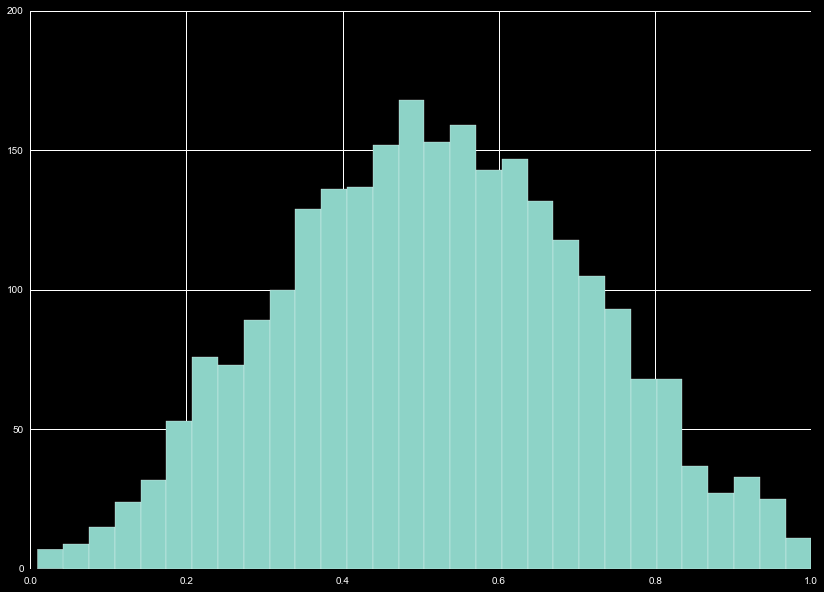

           aapl      awr       ba      cat      cop      dal     farm      gnc      hes      mas      mon     nflx     sbux     tsla      ups  
Means:  
StdDv:  


In [81]:
plotDist( inpFileList, 'rsi_10', xRange=[0,1], yRange=[0,200], rsi=True, norm=False , n_bins=30, SUM=True )

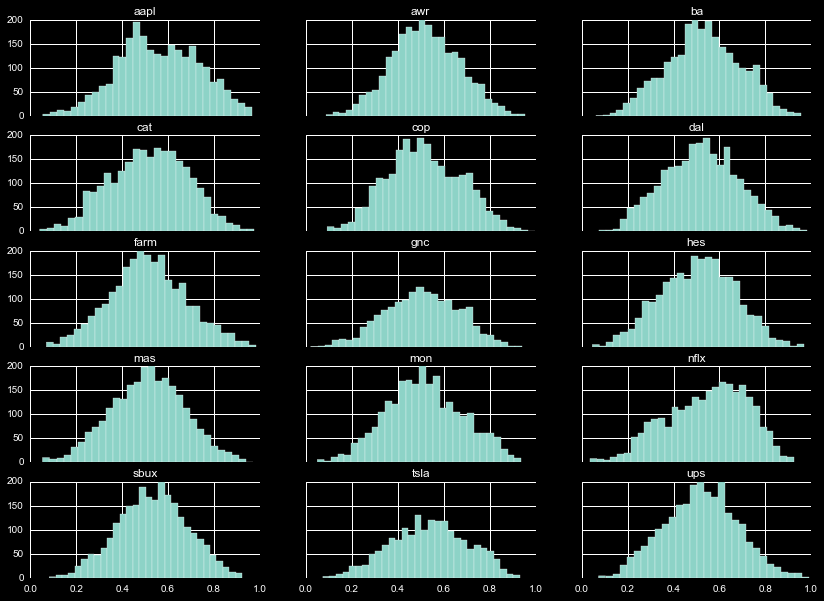

           aapl      awr       ba      cat      cop      dal     farm      gnc      hes      mas      mon     nflx     sbux     tsla      ups  
Means:   0.5582   0.5205   0.5306   0.5164   0.5153   0.5207   0.5140   0.5049   0.5068   0.5126   0.5186   0.5467   0.5333   0.5376   0.5187  
StdDv:   0.1769   0.1462   0.1598   0.1688   0.1614   0.1622   0.1647   0.1597   0.1610   0.1613   0.1664   0.1744   0.1504   0.1653   0.1591  


In [79]:
plotDist( inpFileList, 'rsi_15', xRange=[0,1], yRange=[0,200], rsi=True, norm=False , n_bins=30 )

/home/sean/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:36: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


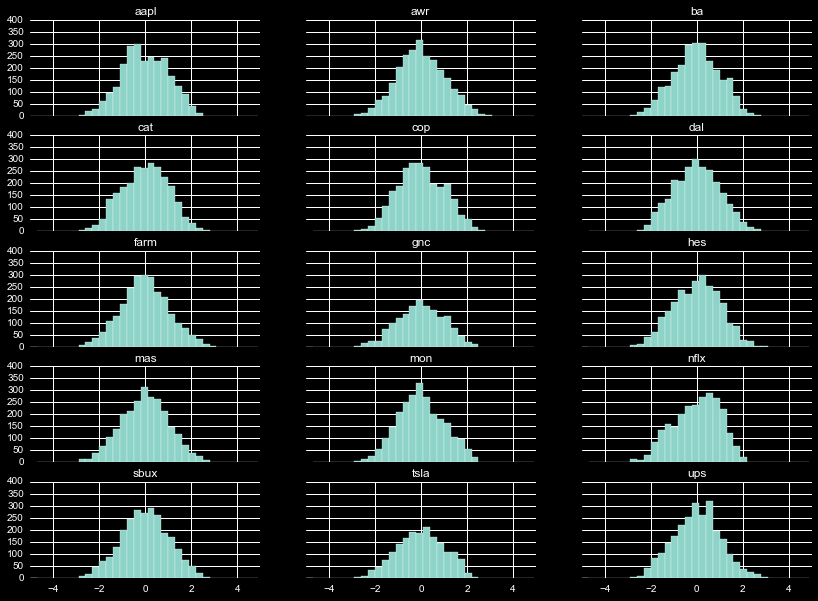

           aapl      awr       ba      cat      cop      dal     farm      gnc      hes      mas      mon     nflx     sbux     tsla      ups  
Means:  -0.0011  -0.0001  -0.0012  -0.0011   0.0012   0.0011   0.0053  -0.0054   0.0001  -0.0091  -0.0067  -0.0080  -0.0056  -0.0016   0.0023  
StdDv:   1.0014   1.0317   1.0015   1.0014   1.0016   1.0014   1.0326   1.0067   1.0141   1.0260   1.0083   1.0100   1.0069   1.0019   1.0084  


In [80]:
plotDist( inpFileList, 'rsi_15', xRange=[-5,5], yRange=[0,400], rsi=True, norm=True , n_bins=np.arange(-5,5,0.3) )

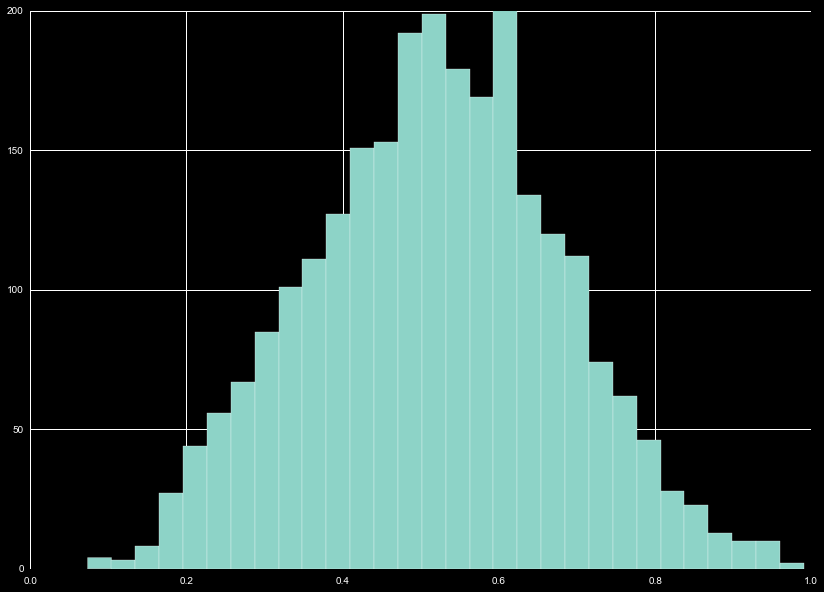

           aapl      awr       ba      cat      cop      dal     farm      gnc      hes      mas      mon     nflx     sbux     tsla      ups  
Means:  
StdDv:  


In [82]:
plotDist( inpFileList, 'rsi_15', xRange=[0,1], yRange=[0,200], rsi=True, norm=False , n_bins=30, SUM=True )

In [26]:
# Use normal scale, subtract off 0.5 and divide by stdev

In [27]:
# 5,10,15,20,25

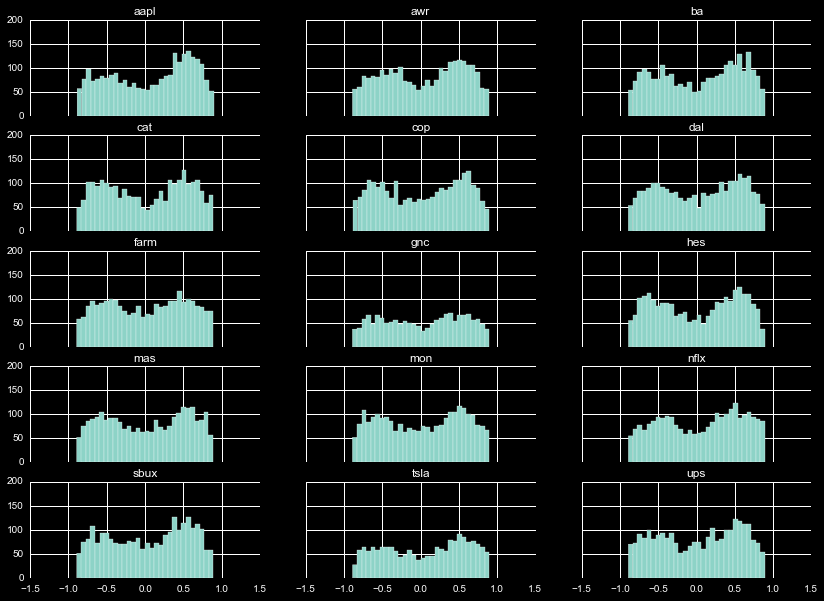

           aapl      awr       ba      cat      cop      dal     farm      gnc      hes      mas      mon     nflx     sbux     tsla      ups  
Means:   0.0655   0.0340   0.0432   0.0159   0.0168   0.0282   0.0163   0.0197   0.0143   0.0201   0.0173   0.0538   0.0395   0.0589   0.0255  
StdDv:   0.5192   0.5065   0.5209   0.5215   0.5162   0.5150   0.5125   0.5128   0.5199   0.5188   0.5199   0.5159   0.5131   0.5201   0.5171  


In [96]:
plotDist( inpFileList, 'bollinger_5', xRange=[-1.5,1.5], yRange=[0,200], bands=True, norm=False , n_bins=30 )

/home/sean/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:36: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


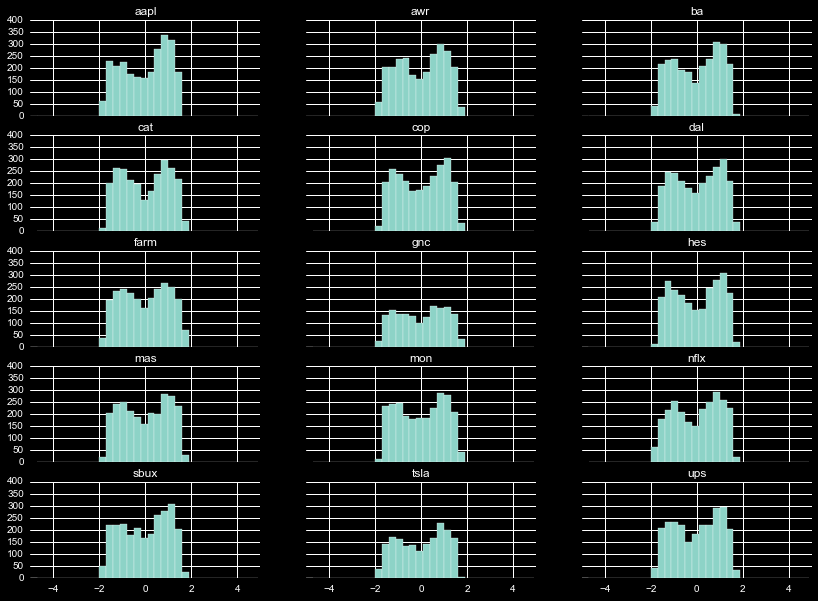

           aapl      awr       ba      cat      cop      dal     farm      gnc      hes      mas      mon     nflx     sbux     tsla      ups  
Means:   0.0000   0.0000   0.0000  -0.0000  -0.0000  -0.0000  -0.0000  -0.0000   0.0000   0.0000   0.0000   0.0000  -0.0000  -0.0000   0.0000  
StdDv:   1.0000   1.0000   1.0000   1.0000   1.0000   1.0000   1.0000   1.0000   1.0000   1.0000   1.0000   1.0000   1.0000   1.0000   1.0000  


In [91]:
plotDist( inpFileList, 'bollinger_5', xRange=[-5,5], yRange=[0,400], bands=True, norm=True , n_bins=np.arange(-5,5,0.3) )

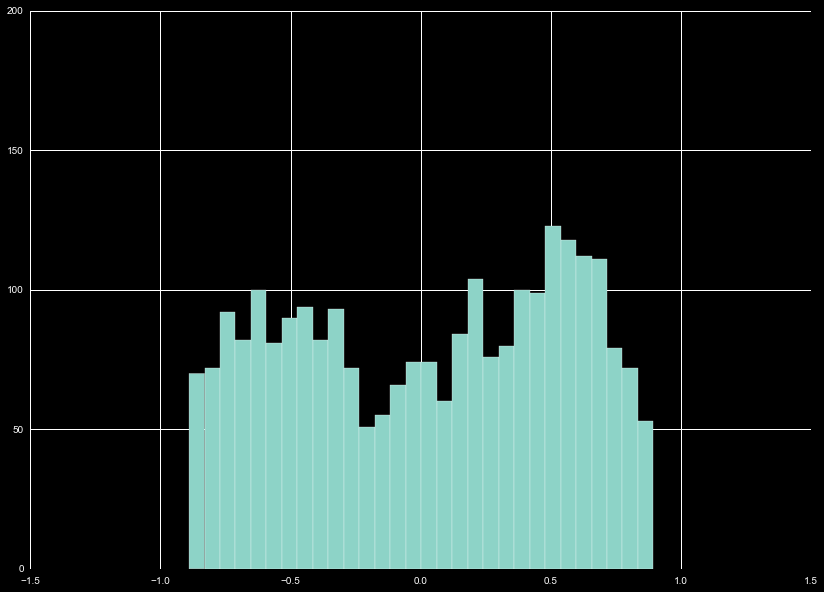

           aapl      awr       ba      cat      cop      dal     farm      gnc      hes      mas      mon     nflx     sbux     tsla      ups  
Means:  
StdDv:  


In [97]:
plotDist( inpFileList, 'bollinger_5', xRange=[-1.5,1.5], yRange=[0,200], bands=True, norm=False , n_bins=30, SUM=True )

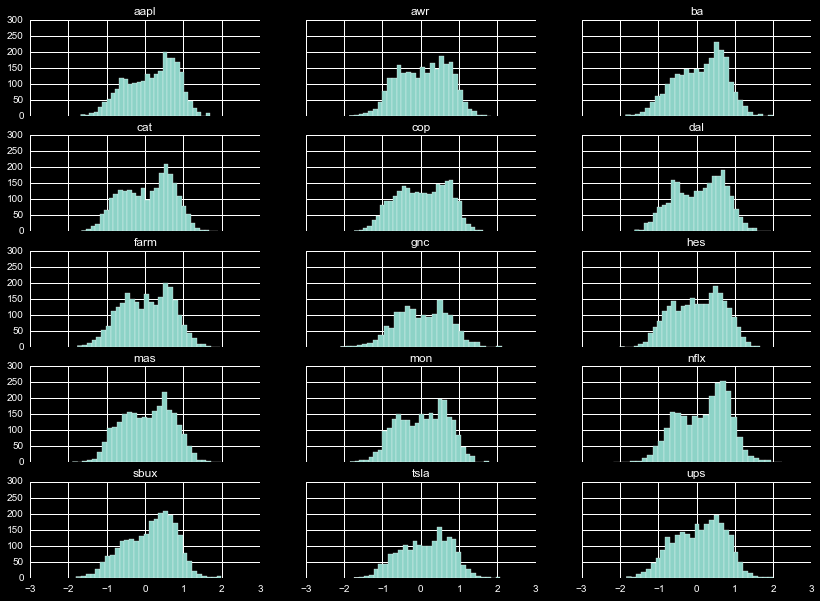

           aapl      awr       ba      cat      cop      dal     farm      gnc      hes      mas      mon     nflx     sbux     tsla      ups  
Means:   0.1729   0.0788   0.1090   0.0682   0.0335   0.0771   0.0458   0.0359   0.0421   0.0607   0.0473   0.1894   0.1324   0.1303   0.0733  
StdDv:   0.6488   0.6500   0.6515   0.6633   0.6713   0.6608   0.6528   0.6634   0.6565   0.6439   0.6477   0.6671   0.6481   0.6536   0.6545  


In [93]:
plotDist( inpFileList, 'bollinger_25', xRange=[-3,3], yRange=[0,300], bands=True, norm=False , n_bins=30 )

/home/sean/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:36: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


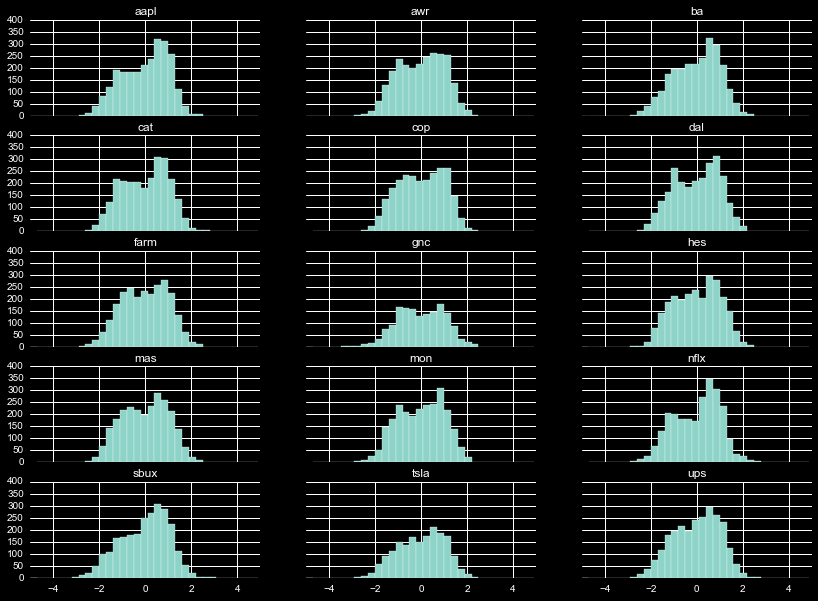

           aapl      awr       ba      cat      cop      dal     farm      gnc      hes      mas      mon     nflx     sbux     tsla      ups  
Means:  -0.0056  -0.0024  -0.0088  -0.0000  -0.0000  -0.0000  -0.0010  -0.0093  -0.0024  -0.0012  -0.0034  -0.0002  -0.0212  -0.0015  -0.0055  
StdDv:   1.0068   1.0031   1.0162   1.0000   1.0000   1.0000   1.0042   1.0272   1.0032   1.0047   1.0043   1.0100   1.0405   1.0063   1.0097  


In [94]:
plotDist( inpFileList, 'bollinger_25', xRange=[-5,5], yRange=[0,400], bands=True, norm=True , n_bins=np.arange(-5,5,0.3) )

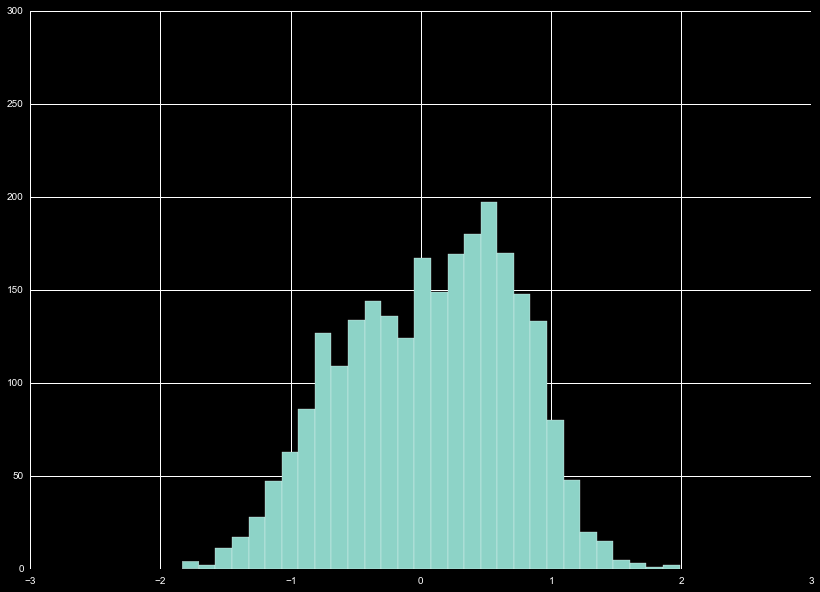

           aapl      awr       ba      cat      cop      dal     farm      gnc      hes      mas      mon     nflx     sbux     tsla      ups  
Means:  
StdDv:  


In [95]:
plotDist( inpFileList, 'bollinger_25', xRange=[-3,3], yRange=[0,300], bands=True, norm=False , n_bins=30, SUM=True )

In [35]:
# Use normal scale, subtract off 0.5, divide by 0.5/2=0.25 (std from bollinger band)